# Market Analysis

* Considerare il servizio **CoinGecko**, che visualizza i prezzi delle cripto in tempo reale
    * i grafici sulle cripto
    * la market cap
    * i volumi di trading.
* scrivere uno scraper che collezioni informazioni sulle criptovalute e produca un insieme di grafici sul loro andamento


# La crescita recente del valore di $BTC

La crescita recente del valore di $BTC e' dovuta all'annuncio di considerazione da parte della Financial Conduct Authority (versione inglese della SEC americana) di iniziare un il trading di BTC e ETH based ETN (exchange-traded notes), versione inglese degli ETF (exchange-traded notes).

Questo segue gia' un'aumento dall'approvazione da parte dell'SEC di 11 spot di BTC ETFs il 10 Gennaio 2024.

Questi spot hanno causato, per esempio, spot come il BlackRock iShares Bitcoin ETF che solamente nel 6/03 ha acquistato piu' di $778M in BTC. 12600 BTC sono stati comprati, il che ha ridotto la supply internazionale di un margine importante

### Date da controllare
- 3 Marzo - 6 Marzo
- 11 Marzo - 12 Marzo
- 14 Marzo - 15 Marzo
- ~25 Febbraio - peak del 14 Marzo

#### Articolo
https://www.forbes.com/advisor/investing/cryptocurrency/why-is-bitcoin-going-up/

In [138]:
import pandas as pd
from pycoingecko import CoinGeckoAPI


from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup as bs
import requests
import re

import datetime

import matplotlib.pyplot as plt
import numpy as np

In [174]:
## Leggo il file dal locale perche' bloccato da cloudfare nel cercare di scrapeare direttamente con requests >:(
with open("./Bitcoin USD Dati storici CoinGecko.html" ,'r',encoding='utf-8') as file:
    file_content = file.read()

soup = bs(file_content , 'html.parser')
table = soup.select(".tw-border-y")[0]


table_descr = [x.text.strip() for x in table.find_all('th')]
# print(table_descr)

historical_data = []
rows = table.find_all("tr")
for row in rows[3::] :
    data = row.find_all("td")
    historical_data.append({"data":data[0].text.strip() , 
                            "Market Cap":data[1].text.strip() ,
                            "Volume":data[2].text.strip(),
                            "Apertura":data[3].text.strip(),
                            "Chiusura":data[4].text.strip()
                           })

df = pd.DataFrame(historical_data)
#converto data in data e le altre colonne in interi
df["data"] = pd.to_datetime(df["data"])

numeric_cols = ["Market Cap" , "Volume" , "Apertura" , "Chiusura"]
def priceToInt(x):
    return re.sub(r'[^\d\-.]', '', str(x)).replace("." , "")
    
for col in numeric_cols: 
    df[col] = df[col].apply(priceToInt)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
print(df)

         data     Market Cap       Volume  Apertura  Chiusura
0  2024-03-18  1344508983080  47190980587     68425       NaN
1  2024-03-17  1282404282863  49265436013     65292   68425.0
2  2024-03-16  1367669237528  81204427005     69498   65292.0
3  2024-03-15  1403843488135  63073551322     71420   69498.0
4  2024-03-14  1436631290572  51906601044     73098   71420.0
..        ...            ...          ...       ...       ...
86 2023-12-23   861822676200  20833936535     44004   43752.0
87 2023-12-22   858312140015  21948638203     43850   44004.0
88 2023-12-21   854173854160  28334648886     43634   43850.0
89 2023-12-20   827483345953  23402523668     42250   43634.0
90 2023-12-19   834757901244  26473040427     42684   42250.0

[91 rows x 5 columns]


## > Ora che ho il dataframe posso iniziare a controllare le date interessanti

#### Grafico generale delle andature dei prezzi in apertura a chiusura

<AxesSubplot:title={'center':'Aperture e chiusure di mercato negli ultimi 3 mesi'}, xlabel='data'>

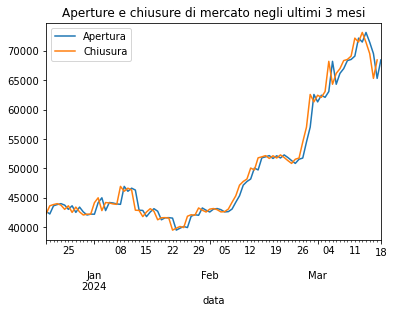

In [124]:
df.plot(x="data" , y=["Apertura","Chiusura"],kind="line" ,stacked=False, title="Aperture e chiusure di mercato negli ultimi 3 mesi")

#### Grafico generale del volume di scambio e il Market Cap

<AxesSubplot:title={'center':'Volume e Market Cap negli ultimi 3 mesi'}, xlabel='data'>

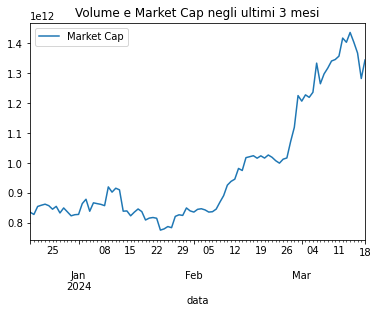

In [169]:
df.plot(x="data" , y=["Market Cap"],kind="line" ,stacked=False, title="Volume e Market Cap negli ultimi 3 mesi")

#### > Aumento del valore di $BTC tra il 3 e il 6 marzo 2024 in relazione al volume scambiato

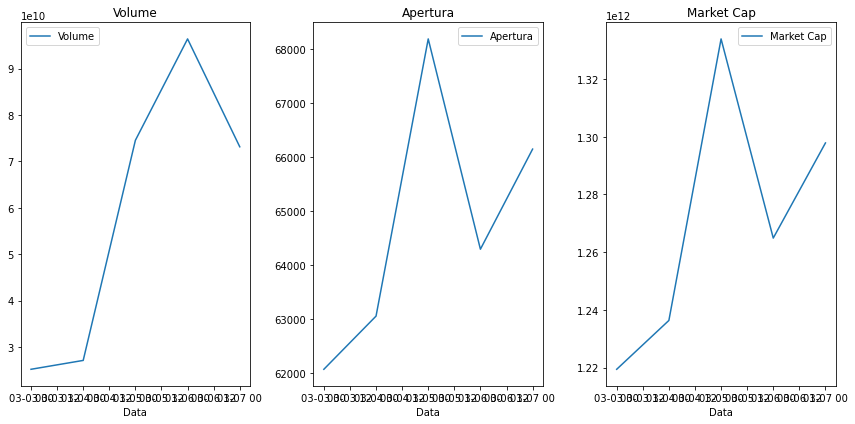

In [171]:
start_date = pd.to_datetime('2024-03-3')
end_date = pd.to_datetime('2024-03-7')

df1 = df[(df.data >= start_date) & (df.data <= end_date)]

dates = df1['data']
volume = df1['Volume']
apertura = df1['Apertura']
mk = df1['Market Cap']


dates = np.array(dates)[:, None]
volume = np.array(volume)[:, None]
apertura = np.array(apertura)[:, None]
mk = np.array(mk)[:, None]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

# Grafico 1 
ax1.plot(dates, volume, label='Volume')
ax1.set_title('Volume')
ax1.set_xlabel('Data')
ax1.legend()

# Grafico 2 
ax2.plot(dates, chiusura, label='Apertura')
ax2.set_title('Apertura')
ax2.set_xlabel('Data')
ax2.legend()

# Grafico 3
ax3.plot(dates, mk, label='Market Cap')
ax3.set_title('Market Cap')
ax3.set_xlabel('Data')
ax3.legend()

# Display 
plt.tight_layout()
plt.show()

#### Cambiamento di valore dall'apertura del 11 Marzo alla chiusura del 12 Marzo


Text(0, 0.5, 'Prezzo')

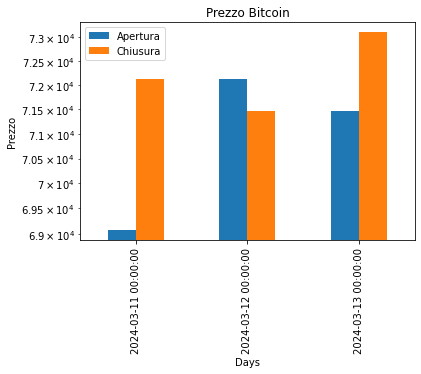

In [157]:
start_date = pd.to_datetime('2024-03-11')
end_date = pd.to_datetime('2024-03-13')

df2 = df[(df.data >= start_date) & (df.data <= end_date)]
df2 = df2.sort_values(by='data')
df2.plot(
    x="data",
    y=["Apertura", "Chiusura"],
    kind="bar",
    stacked=False,
    logy=True
)

plt.title("Prezzo Bitcoin")
plt.xlabel('Days')
plt.ylabel('Prezzo')

#### > Seguente drop post-hype del 14-15 Marzo

Text(0, 0.5, 'Prezzo')

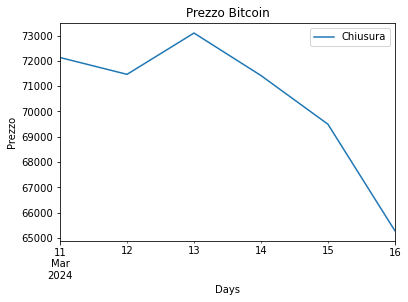

In [166]:
start_date = pd.to_datetime('2024-03-11')
end_date = pd.to_datetime('2024-03-16')

df2 = df[(df.data >= start_date) & (df.data <= end_date)]
df2 = df2.sort_values(by='data')
df2.plot(
    x="data",
    y=["Chiusura"],
    kind="line",
    stacked=False,
    logy=False
)

plt.title("Prezzo Bitcoin")
plt.xlabel('Days')
plt.ylabel('Prezzo')

#### Aumento dal 25 Febbraio al 13 marzo

Text(0, 0.5, 'Prezzo')

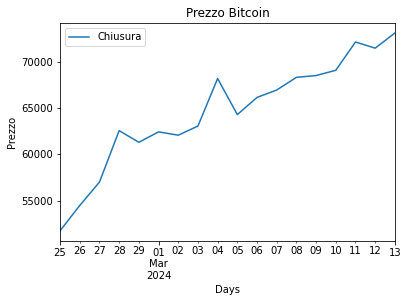

In [167]:
start_date = pd.to_datetime('2024-02-25')
end_date = pd.to_datetime('2024-03-13')

df2 = df[(df.data >= start_date) & (df.data <= end_date)]
df2 = df2.sort_values(by='data')
df2.plot(
    x="data",
    y=["Chiusura"],
    kind="line",
    stacked=False,
    logy=False
)

plt.title("Prezzo Bitcoin")
plt.xlabel('Days')
plt.ylabel('Prezzo')